In [42]:
# import dependencies
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize
import re
import itertools
import matplotlib.pyplot as plt

## nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import spacy
nlp = spacy.load('en')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [29]:
new_data = pd.read_csv('new_data.csv')

In [30]:
stop_words = set(stopwords.words("english")) # create list of stop words
def cleantext(string):
    text = string.lower().split() # convert letters to lowercase and split claims ('tweets') into separate words
    text = " ".join(text) # ???
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text) # replace '&' with ' and '
    text = text.replace('&amp',' ') # replace '&amp' with empty space
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text) # replace non-letters, non-numbers, & punctuation with empty space
    text = text.split() # ??? 
    #text = [ps.stem(word) for word in text] # set text equal to stemmed words
    text = [w for w in text if not w in stop_words] # remove stop words 
    text = " ".join(text) # joining the seperated pieces of string into one string
    return text

# apply cleantext() function to all tweets 
new_data['statement'] = new_data['statement'].map(lambda x: cleantext(x))


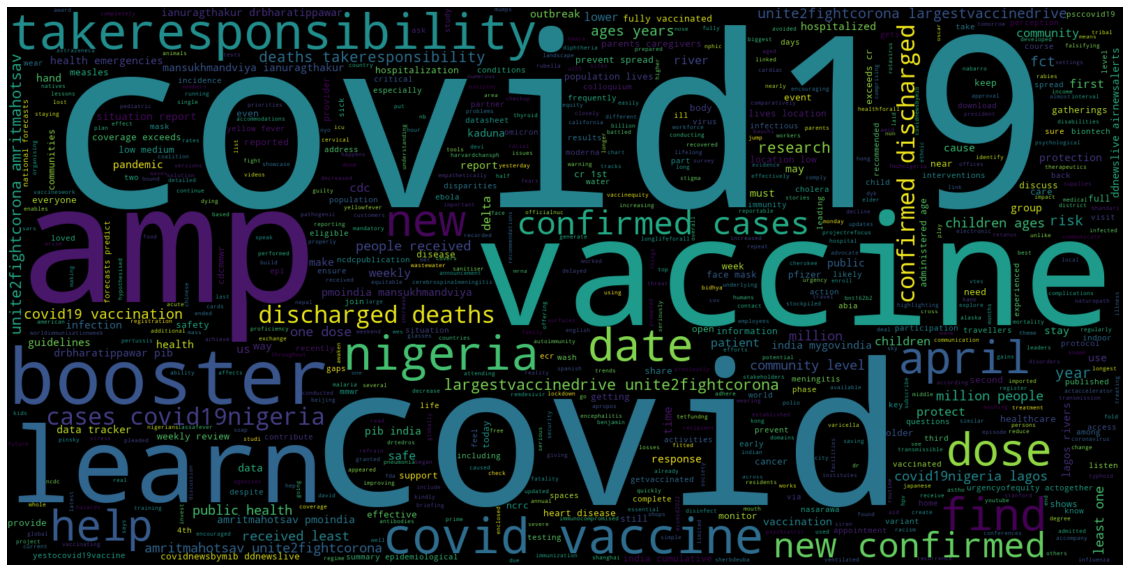

In [35]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.label == "real"].statement))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show
plt.savefig('/content/drive/MyDrive/Final Project/COVID-fake-news-detection/img/wc_real_new.png', bbox_inches='tight')

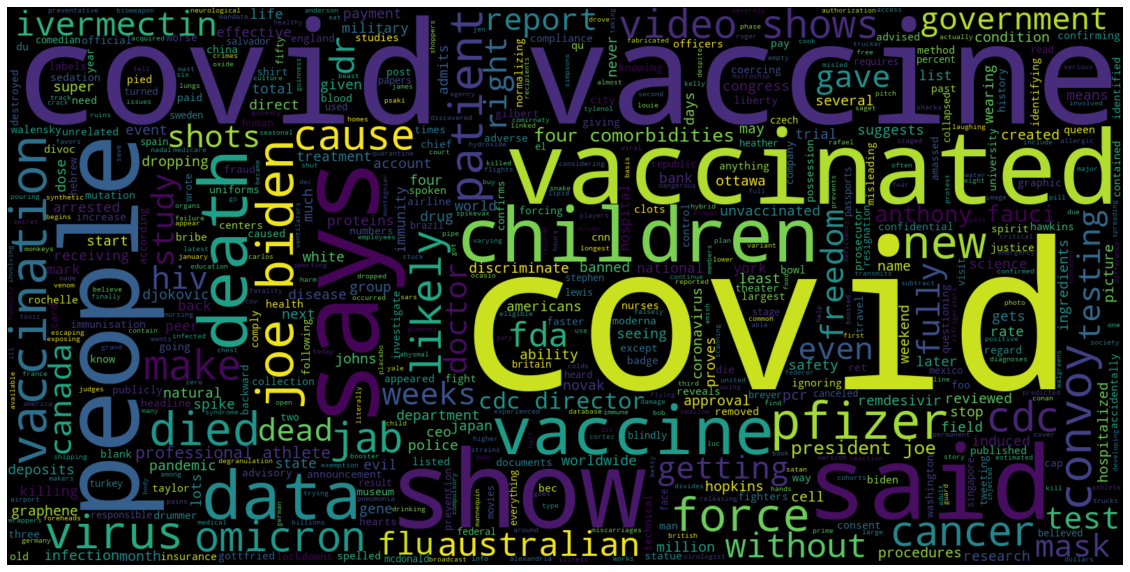

In [36]:
plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.label == "fake"].statement))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show
plt.savefig('/content/drive/MyDrive/Final Project/COVID-fake-news-detection/img/wc_fake_new.png', bbox_inches='tight')

In [46]:
pip install scattertext

In [48]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [49]:
new_data['statement'] = new_data['statement'].apply(nlp)

In [50]:
corpus = st.CorpusFromParsedDocuments(new_data, category_col='label', parsed_col='statement').build()

In [38]:
html = produce_scattertext_explorer(corpus,
                             category='real',
                             category_name='real',
                              not_category_name='fake',
                              width_in_pixels=1000,
                              minimum_term_frequency=5,
                              transform=st.Scalers.log_scale_standardize,
                              metadata=new_data['statement'])

In [51]:
corpus_dataframe = new_data
html = scattertext.produce_scattertext_explorer(
                   corpus,
                   category='Low Rating',
                   category_name='Low Rating',
                   not_category_name='High Rating',
                   width_in_pixels=1000,
                   metadata=corpus_dataframe['statement'])

NameError: ignored

In [41]:
open("New_data-Scattertext.html", 'wb').write(html.encode('utf-8'))

432524

In [ ]:
import IPython
IPython.display.HTML(filename='/content/Convention-Visualization.html')

Compare to original scatterplot